<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [96]:
# imports
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

%load_ext tensorboard
import tensorflow as tf
import os
import datetime

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [92]:
# loading data into train/test
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [93]:
# transforming the data to be on same scale
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
# instantiating a model object
model = Sequential()

# adding layers to the model
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

# compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')

# fitting the model, The MSE of the final epoch was 21.1305
model = model.fit(x=X_train, 
          y=y_train, 
          epochs=1000, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/1000
13/13 [==============================] - 0s 16ms/step - loss: 580.8026 - mse: 580.8026 - val_loss: 604.8547 - val_mse: 604.8547
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 568.7109 - mse: 568.7109 - val_loss: 589.1577 - val_mse: 589.1577
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 552.6367 - mse: 552.6367 - val_loss: 570.7084 - val_mse: 570.7084
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 532.5071 - mse: 532.5071 - val_loss: 547.0304 - val_mse: 547.0304
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 508.9524 - mse: 508.9524 - val_loss: 518.2354 - val_mse: 518.2354
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 476.6671 - mse: 476.6671 - val_loss: 481.1942 - val_mse: 481.1942
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 438.9282 - mse: 438.9282 - val_loss: 434.2910 - val_mse: 434.2910
Epoch 8/1000
13/13 

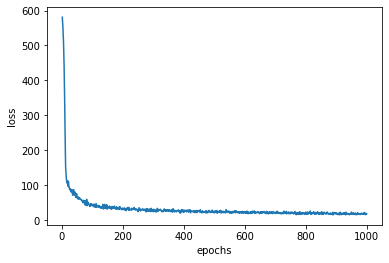

In [103]:
# using history to make a graph
history = model.history
df = pd.DataFrame(data={
    'epochs':[x + 1 for x in range(len(history['loss']))],
    'loss':history['loss'],
    'mse':history['mse'],
    'val_loss':history['val_loss'],
    'val_mse':history['val_mse'],
})

sns.lineplot(x='epochs', y='loss', data=df);

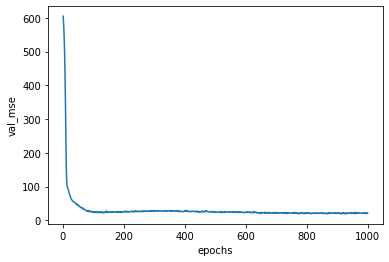

In [104]:
sns.lineplot(x='epochs', y='val_mse', data=df);

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.